Практична робота №2

Баш А.
МІТ-31

Завдання: Генерація та класифікація випадкових даних кредитних заявок

Ваше завдання - згенерувати випадковий набір даних про кредитні заявки та побудувати модель класифікації для визначення, чи кредитна заявка "одобрена" чи "відхилена" на основі цих даних.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

Використовуйте бібліотеку NumPy для генерації випадкових даних. Створіть матрицю ознак X та вектор цільової змінної y. Ознаки можуть бути числовими та категорійними.

Згенеруйте випадкові дані, що відповідають "одобрено" (клас 1) та "відхилено" (клас 0) кредитних заявок.

In [3]:
# Генерація випадкових даних про кредитні заявки
np.random.seed(42)

numeric_features = np.random.rand(1000, 3)
employment_status = np.random.choice(['Employed', 'Unemployed'], size=(1000, 1))
important_feature = np.random.randint(2, size=(1000, 1))
target = (important_feature > 0.5).astype(int)

df = pd.DataFrame(np.hstack((numeric_features, employment_status, important_feature, target)), 
                  columns=['feature_0', 'feature_1', 'feature_2', 'employment_status', 'important_feature', 'target'])

# Розділ даних на ознаки та цільову змінну
X = df.drop('target', axis=1)
y = df['target']
df

,feature_0,feature_1,feature_2,employment_status,important_feature,target
0,0.3745401188473625,0.9507143064099162,0.7319939418114051,Employed,1,1
1,0.5986584841970366,0.15601864044243652,0.15599452033620265,Employed,1,1
2,0.05808361216819946,0.8661761457749352,0.6011150117432088,Employed,0,0
3,0.7080725777960455,0.020584494295802447,0.9699098521619943,Unemployed,0,0
4,0.8324426408004217,0.21233911067827616,0.18182496720710062,Employed,0,0
...,...,...,...,...,...,...
995,0.9670352752561462,0.0516687216579611,0.5047955983045281,Unemployed,0,0
996,0.7184539473225501,0.862640471149179,0.17925561190779005,Unemployed,1,1
997,0.8000034817636814,0.5527070757185453,0.3965536819899632,Employed,1,1
998,0.13171502857909356,0.8652957589089124,0.15727320817971535,Employed,0,0


Розділіть дані на тренувальний та тестовий набори.

In [4]:
# Розділ даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Виберіть модель класифікації з бібліотеки scikit-learn (наприклад, метод опорних векторів, логістична регресія або дерево рішень) та навчіть модель на тренувальних даних.

In [5]:
# Підготовка даних для моделі (стандартизація числових ознак та кодування категорійних)
numeric_features = ['feature_0', 'feature_1', 'feature_2']
categorical_features = ['employment_status']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Побудова моделі логістичної регресії
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Навчання моделі
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['feature_0', 'feature_1',
                                                   'feature_2']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['employment_status'])])),
                ('classifier', LogisticRegression(random_state=42))])

Оцініть точність моделі на тестовому наборі даних та побудуйте матрицю неправильно класифікованих прикладів та звіт про класифікацію.

In [7]:
# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка результатів
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.4150

Confusion Matrix:
[[31 75]
 [42 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.29      0.35       106
           1       0.41      0.55      0.47        94

    accuracy                           0.41       200
   macro avg       0.42      0.42      0.41       200
weighted avg       0.42      0.41      0.40       200



У цьому коді ми генеруємо випадкові дані про кредитні заявки, розділяємо їх на тренувальний та тестовий набори, побудовуємо модель логістичної регресії, навчаємо її на тренувальних даних та оцінюємо її на тестових даних.

Використайте бібліотеку Matplotlib для візуалізації результатів. Наприклад, побудуйте графік розподілу кредитів за категоріями "одобрено" та "відхилено".

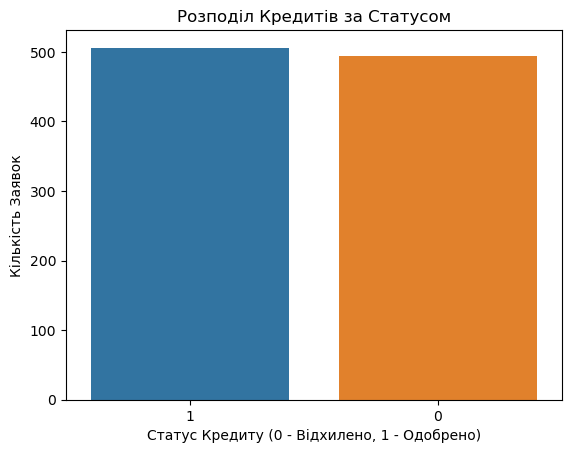

In [9]:
sns.countplot(x='target', data=df)
plt.xlabel('Статус Кредиту (0 - Відхилено, 1 - Одобрено)')
plt.ylabel('Кількість Заявок')
plt.title('Розподіл Кредитів за Статусом')
plt.show()